> Hands-On Graph Neural Networks Using Python

## Chapter 2

그래프 구조를 다루는 패키지인 netwokrx를 활용한 기본적인 그래프 구현 실습

- 그래프는 정점(노드)이라는 객체 집합과 정점 쌍을 연결하는 간선(엣지)이라고 하는 연결 집합으로 구성된 수학적 구조
- $G = (V,E)$라는 표기법은 그래프를 나타내는 데 사용되며 여기서 그래프는 노드의 집합이며, 간선의 집합

- 그래프의 노드는 도시, 사람, 웹 페이지 또는 분자와 같은 모든 객체 간의 관계 또는 연결을 나타냄

- 엣지는 물리적 도로, 사회적 관계, 하이퍼링크 또는 화학 결합과 같은 객체 간의 관계 또는 연결을 나타냄

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

그래프의 가장 기본적인 속성 중 하나는 그래프가 방향성이 있는지 여부

nx.Graph 는 방향이 없는 그래프를 생성하기 위한 메소드

즉, 두 노드 사이의 엣지는 어느 방향으로든 이동할 수 있으며 노드를 방문하는 순서는 중요하지 않음

그래프의 노드에는 데이터 또는 속성을 저장, 엣지는 방향이 없기 때문에 자체 순회는 가능하지만 다중(병렬) 엣지는 불가능

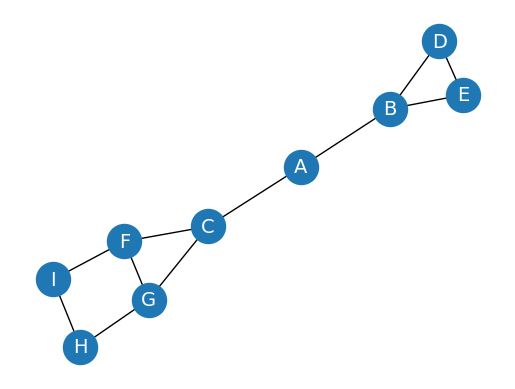

In [2]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G'), ('D', 'E'),('G', 'H'), ('F', 'I'), ('F', 'G'), ('I', 'H')])

plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

nx.DiGraph는 방향이 존재하는 엣지를 포함하는 그래프 구조의 메소드

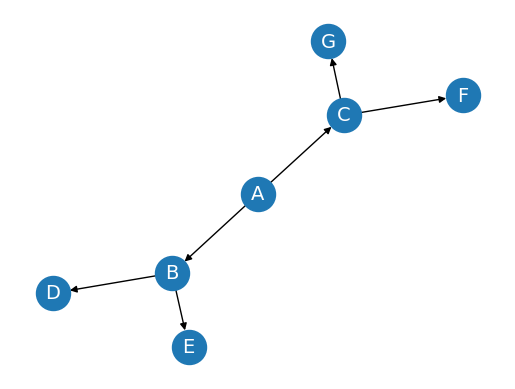

In [15]:
DG = nx.DiGraph()
DG.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

plt.axis('off')
nx.draw_networkx(DG,
                 pos=nx.spring_layout(G, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

가중치(Weighted) 그래프에서 각 엣지에는 가중치(거리, 이동 시간 또는 비용)를 통해 다양한 요소를표현 가능

가중치가 없는 그래프 구조의 경우 노드 간의 관계가 이진인 상황에서 일반적으로 사용됨, 엣지는 단순히 노드 간의 연결 유무를 나타냄

nx.draw_networkx_edge_labels() 메소드는 Text(x, y, label)의 결과를 나타냄, x,y 좌표는 엣지 라벨이 표시될 위치를 나타내는 좌표 값

{('A', 'B'): Text(0.4595995822658106, 0.2339015485495598, '10'),
 ('A', 'C'): Text(0.04114557556233164, 0.014394363857754541, '20'),
 ('B', 'D'): Text(0.7777545121154877, 0.4685457443305071, '30'),
 ('B', 'E'): Text(0.8326055492520223, 0.36885861060524616, '40'),
 ('C', 'F'): Text(-0.36304186627941937, -0.12397908797539567, '50'),
 ('C', 'G'): Text(-0.30767806083501326, -0.23281315516433665, '60')}

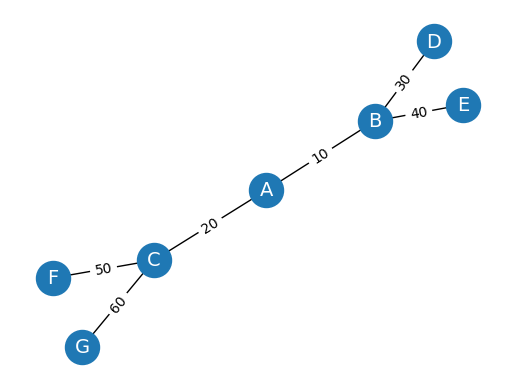

In [35]:
WG = nx.Graph()
WG.add_edges_from([('A', 'B', {"weight": 10}), ('A', 'C', {"weight": 20}), ('B', 'D', {"weight": 30}), ('B', 'E', {"weight": 40}), ('C', 'F', {"weight": 50}), ('C', 'G', {"weight": 60})])
labels = nx.get_edge_attributes(WG, "weight")

plt.axis('off')
nx.draw_networkx(WG,
                 pos=nx.spring_layout(G, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )
nx.draw_networkx_edge_labels(WG, pos=nx.spring_layout(G, seed=0), edge_labels=labels)

Connected Graph를 표현하기 위해 networkx 라이브러리에서는 그래프 객체가 연결되었는지 여부를 확인하기 위한 내장 함수를 제공

In [17]:
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3), (3, 1), (4, 5)])
print(f"Is graph 1 connected? {nx.is_connected(G1)}")

G2 = nx.Graph()
G2.add_edges_from([(1, 2), (2, 3), (3, 1), (1, 4)])
print(f"Is graph 2 connected? {nx.is_connected(G2)}")

Is graph 1 connected? False
Is graph 2 connected? True


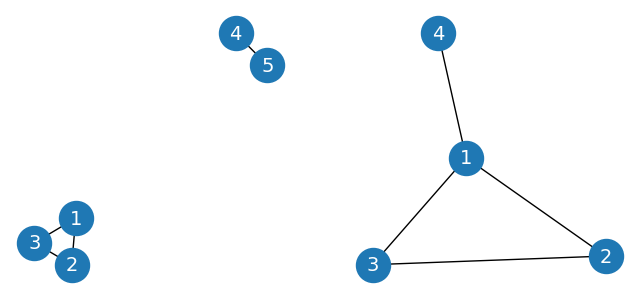

In [18]:
plt.figure(figsize=(8,8))
plt.subplot(221)
plt.axis('off')
nx.draw_networkx(G1,
                 pos=nx.spring_layout(G1, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )
plt.subplot(222)
plt.axis('off')
nx.draw_networkx(G2,
                 pos=nx.spring_layout(G2, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

방향 그래프에서 차수는 두 가지 유형으로 나뉨: Indegree, Outdegree

- Indegree: 해당 노드를 가리키는 간선의 수, Indegree가 높은 노드는 중요한 정보나 리소스의 출처가 될 가능성 존재
- Outdegree: 해당 노드에서 시작하는 간선의 수, Outdegree가 높은 노드는 중요한 목적지나 정보 또는 리소스의 소비자가 될 가능성이 높음



In [19]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])
print(f"deg(A) = {G.degree['A']}")

DG = nx.DiGraph()
DG.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])
print(f"deg^-(A) = {DG.in_degree['A']}")
print(f"deg^+(A) = {DG.out_degree['A']}")

deg(A) = 2
deg^-(A) = 0
deg^+(A) = 2


Centrality는 네트워크 구조에서 노드의 중요성을 정량화하는 지표.

네트워크 내 정보 흐름이나 상호작용에 미치는 연결성과 영향을 기반으로 그래프의 주요 노드를 식별

- Degree Centrality: 노드가 그래프의 다른 노드롸 많이 연결되어 있음을 나타냄
- Closeness Centrality: 해당 노드가 다른 모든 노드와 얼마나 가까운 지를 나타냄
- Betweenness Centrality: 노드가 그래프의 다른 노드 쌍 사이의 최단 경로에 있는 횟수를 측정정

In [20]:
print(f"Degree centrality      = {nx.degree_cㅁㅁentrality(G)}")
print(f"Closeness centrality   = {nx.closeness_centrality(G)}")
print(f"Betweenness centrality = {nx.betweenness_centrality(G)}")

Degree centrality      = {'A': 0.3333333333333333, 'B': 0.5, 'C': 0.5, 'D': 0.16666666666666666, 'E': 0.16666666666666666, 'F': 0.16666666666666666, 'G': 0.16666666666666666}
Closeness centrality   = {'A': 0.6, 'B': 0.5454545454545454, 'C': 0.5454545454545454, 'D': 0.375, 'E': 0.375, 'F': 0.375, 'G': 0.375}
Betweenness centrality = {'A': 0.6, 'B': 0.6, 'C': 0.6, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0}


Adjacency matrix(인접행렬)은 그래프의 엣지를 나타내는 행렬

각 셀은 두 노드 사이에 간선이 있는지 여부를 나타냄, 셀의 값이 1이면 노드와 노드 사이에 간선이 있음을 나타냄
무방향 그래프의 경우 행렬은 대칭이지만 방향이 있는 그래프의 경우 행렬이 반드시 대칭일 필요는 없음

인접행렬의 장점
1. 두 노드가 연결되어 있는지 여부를 확인하기 위한 연산 시간을 줄여줌
2. 두 노드 사이의 최단 경로를 계산하는 것과 같은 특정 그래프 알고리즘에 유용한 행렬 연산을 수행하도록 함

인접행렬의 단점
1. 그래프의 노드 수가 증가함에 따른 저장 공간 부족 문제가 발생할 수 있음
2. 노드를 추가하거나 제거하기 위한 변경 작업에 비효율 적임

In [21]:
adj = [[0,1,1,0,0,0,0],
       [1,0,0,1,1,0,0],
       [1,0,0,0,0,1,1],
       [0,1,0,0,0,0,0],
       [0,1,0,0,0,0,0],
       [0,0,1,0,0,0,0],
       [0,0,1,0,0,0,0]]

edge_list = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6)]

adj_list = {
    0: [1, 2],
    1: [0, 3, 4],
    2: [0, 5, 6],
    3: [1],
    4: [1],
    5: [2],
    6: [2]
}

# BFS(넓이 우선 탐색)

- 루트 노드에서 시작하여 특정 레벨의 모든 인접 노드를 탐색한 후 다음 레벨의 노드로 이동하는 그래프 탐색 알고리즘
- 방문할 노드의 대기열(queue)에 방문한 각 노드를 queue에 추가할 때 표시하는 방식으로 구현
- 알고리즘은 다음 노드를 방문하고 모든 이웃 노드를 탐색하여 아직 방문하지 않은 경우 queue에 추가
- 시간 복잡도의 경우 $O(|V|+|E|)$ 이며, $V$는 노드의 수, $E$는 간선의 수를 나타냄 

In [22]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

def bfs(graph, node):
    visited, queue = [node], [node]

    while queue:
        node = queue.pop(0)
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.append(neighbor)
                queue.append(neighbor)

    return visited

bfs(G, 'A')

['A', 'B', 'C', 'D', 'E', 'F', 'G']

# DFS(깊이 우선 탐색)

- 루트 노드에서 시작하여 각 브랜치를 따라 가능한 한 멀리 탐색한 후 백트래킹하는 재귀 알고리즘
- 노드를 선택하고 방문하지 않은 모든 이웃을 탐색하며, 탐색되지 않은 첫 번째 이웃을 방문하고 모든 이웃 노드를 방문한 경우에만 백트래킹 수행
- DFS는 그래프에서 주기를 찾는 데 유용하며, 탐색 중에 노드를 두 번 방뭄하는 경우에만 주기가 존재
- BFS와 동일한 시간 복잡도, 메모리가 적게 필요하지만 최단 경로 솔루션을 보장하지 않음
- BFS와 달리 DFS는 무한 루프에 같힐 수 있음

In [23]:
visited = []

def dfs(visited, graph, node):
    if node not in visited:
        visited.append(node)
        for neighbor in graph[node]:
            visited = dfs(visited, graph, neighbor)

    return visited

dfs(visited, G, 'A')

['A', 'B', 'D', 'E', 'C', 'F', 'G']